In [1]:
import seaborn as sns
import pandas as pd
from pathlib import  Path
import matplotlib.pyplot as plt


report_directory = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT"
plot_saving_dir = "/media/kusterlab/internal_projects/active/TOPAS/Publications/Manuscript_MTB/Invests for Paper_Amir/3C"

def get_z_score_per_patient_per_protein_name_fp(patient,protein,df):
    col = 'zscore_' + patient
    return df.loc[df['Gene names']==protein,col] .tolist()[0]



def unnest_proteingroups(df:pd.DataFrame, column_split = 'Uniprot') -> pd.DataFrame:
    """
    Unnest the protein_groups A;B as two separate rows with the same intensity values for each
    the protein groups are the index of the the pandas dataframe df
    """
    temp_df = df
    temp_df['index'] = temp_df[column_split].str.split(';')
    temp_df = temp_df.explode('index')
    temp_df = temp_df.set_index('index')
    return temp_df
    



fp_measures_path = Path(report_directory) / Path('full_proteome_measures_z.tsv')
fp_measure_df = pd.read_csv(fp_measures_path,sep='\t')

basket_scores_path = Path(report_directory) / Path('basket_scores_4th_gen_zscored.tsv')
basket_scores_df = pd.read_csv(basket_scores_path,sep='\t')

In [2]:
list_proteins = {'EGFR':'EGFR',
                'FGFR':'FGFR1',
                'PDGFR':'PDGFRB',
                'IGF1R':'IGF1R',
                'AXL':'AXL',
                'EPHB3':'EPHB3',
                'EPHB4':'EPHB4',
                'EPH':'EPHB3;EPHB4',
                }

list_patients = ['H021-WJQEW5-T1',
                'H021-VGVHN6-T3',
                'H021-8DSJKN-T1-Q1',
                'H021-JDDYR6-T1-Q1',
                'I007-126-1T1-P1',
                'I049-022-XT1-P1',
                'H021-VDA4RJ-M1',
                'I012-003-1T1-P1',
                'I002-019-1T1-P1',
                'H021-3ZPN6C-M1-Q1',
]

#  FP level

In [3]:
"""
fp_measure_df = unnest_proteingroups(fp_measure_df,column_split='Gene names')
fp_measure_df['Gene names'] = fp_measure_df.index
fp_list_proteins = [x for x in list_proteins.values() if x in fp_measure_df['Gene names'].unique().tolist()]
fp_measure_df = fp_measure_df[fp_measure_df['Gene names'].isin(fp_list_proteins)]
fp_measure_df.columns = [x.replace('zscore_','') for  x  in fp_measure_df.columns]
fp_measure_df = pd.melt(fp_measure_df,id_vars=['Gene names'],value_name='Z-score',var_name='patient')

fp_measure_df['level'] = 'FP'
"""


"\nfp_measure_df = unnest_proteingroups(fp_measure_df,column_split='Gene names')\nfp_measure_df['Gene names'] = fp_measure_df.index\nfp_list_proteins = [x for x in list_proteins.values() if x in fp_measure_df['Gene names'].unique().tolist()]\nfp_measure_df = fp_measure_df[fp_measure_df['Gene names'].isin(fp_list_proteins)]\nfp_measure_df.columns = [x.replace('zscore_','') for  x  in fp_measure_df.columns]\nfp_measure_df = pd.melt(fp_measure_df,id_vars=['Gene names'],value_name='Z-score',var_name='patient')\n\nfp_measure_df['level'] = 'FP'\n"

In [4]:
basket_df = basket_scores_df.set_index('Sample').T
target_columns = basket_df.filter(regex='targets').columns.tolist()
REGEX = r'(^\S+-.+-\S)|(Reporter intensity corrected)|(^P\d{6}$)'  # patient identifiers
basket_df = basket_df.filter(regex=REGEX)
basket_df = basket_df.drop(columns=target_columns)
df = basket_df.T
df['Sample'] = df.index
df = df.loc[list_patients,:]

In [5]:
metled = pd.melt(df,id_vars='Sample',value_name='Z-score',var_name='protein')
metled['color'] = 'grey'
proteins_interest = [x for x in metled.protein.unique().tolist() if x in list_proteins.keys()]
final_df = metled[metled.Sample.isin(list_patients)]
final_df['color'] = ''
final_df.color[final_df.protein == 'EGFR'] ='EGFR'
final_df.color[final_df.protein == 'FGFR'] ='FGFR'
final_df.color[final_df.protein == 'PDGFR'] ='PDGFR'
final_df.color[final_df.protein == 'IGF1R'] ='IGF1R'
final_df.color[final_df.protein == 'AXL'] ='AXL'
hue_order = ['EGFR','FGFR','PDGFR','IGF1R','AXL']
palette = ['tab:grey', 'tab:red', 'tab:orange', 'tab:green','tab:pink','tab:olive']

/tmp/ipykernel_659280/3770651827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.color[final_df.protein == 'EGFR'] ='EGFR'
/tmp/ipykernel_659280/3770651827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.color[final_df.protein == 'FGFR'] ='FGFR'
/tmp/ipykernel_659280/3770651827.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.color[final_df.protein == 'PDGFR'] ='PDGFR'
/tmp/ipykernel_659280/3770651

In [6]:
# mapping with sudo identifier
meta_data_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230801.xlsx'
meta_data = pd.read_excel(meta_data_path)
meta = meta_data[meta_data['Sample name'].isin(list_patients)][['Sample name', 'Paper_pseudo_identifier']].set_index('Sample name').to_dict()['Paper_pseudo_identifier']
final_df.Sample = final_df.Sample.map(meta)

In [7]:
extra_basekts = ['ALT_EJ',
'Apoptosis',
'BER',
'Biomarker',
'FA',
'HR',
'IFN',
'Immune_checkpoints',
'Infiltration_Inflammation',
'NER',
'NHEJ',
'RHO_GTPases',
'SHP2',
'TGFb',
'Tumorantigens']
extra_basekts = [x for x in final_df.protein.unique().tolist() if x in extra_basekts]
#final_df = final_df[final_df['Z-score']!=0]
final_df = final_df[~final_df['protein'].isin(extra_basekts)]

# TUPAC or basket level

/tmp/ipykernel_659280/3581852037.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


<Figure size 734.4x777.6 with 0 Axes>

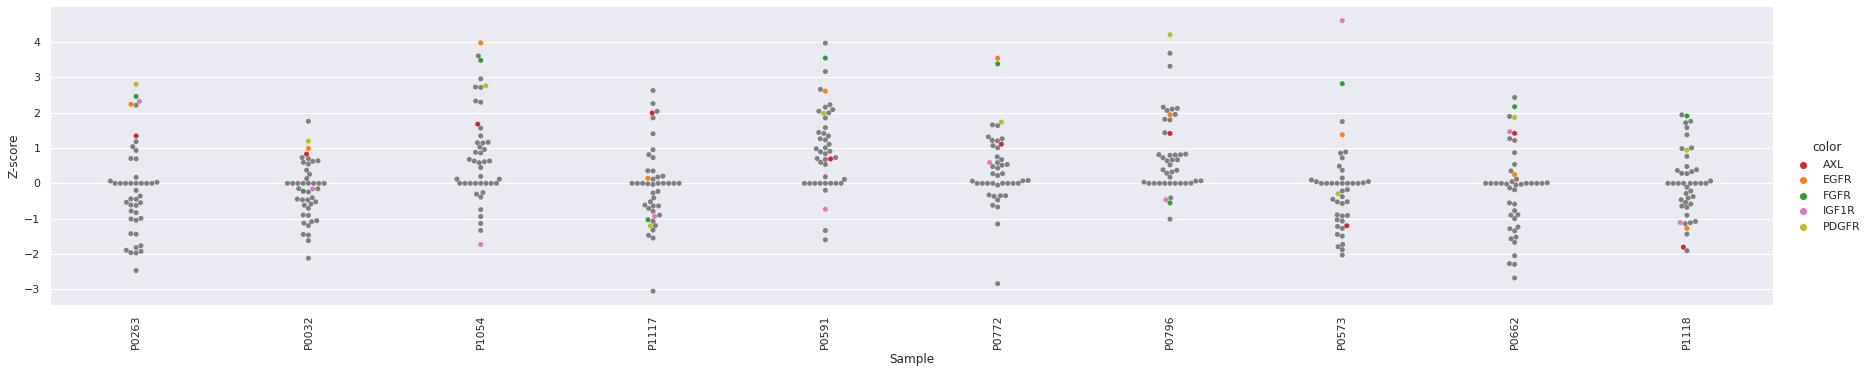

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10.20,10.80))
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_style('darkgrid', {'legend.frameon':True})
hue_order = ['Third', 'Second', 'First']
g= sns.catplot(
    data=final_df, kind="swarm",
    x="Sample", y="Z-score", hue="color",palette=palette,
    #hue_order=hue_order,
    aspect=5
)
rotation = 90 
for i, ax in enumerate(g.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


plt.savefig('swarm.svg',dpi=300)
